<a href="https://colab.research.google.com/github/DearZiZiZi/FF/blob/main/Datathon2023_Zhulbarissov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries & data

In [1]:
import pandas as pd
import numpy as npФ
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Path to the directory containing your Excel files
directory_path = '/content/drive/MyDrive/Datathon 2023/'

# List of file names
file_names = ['synthetic_data_2020_D004.xlsx', 'synthetic_data_2021_D004.xlsx', 'synthetic_data_2022_D004.xlsx']

Analyze the data by each file [RAW]

Группировка по КАТО каждого файла

In [ ]:
# Function to calculate and display grouped statistics for each file
def calculate_grouped_statistics(file_name):
    # Full path to the Excel file
    full_path = directory_path + file_name

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(full_path)

    # Group by the "KATO_2" column and calculate sum for each group
    grouped_df = df.groupby('KATO_2').sum()

    # Display the grouped statistics
    print(f"Grouped Statistics for {file_name} by KATO_2:")
    print(grouped_df.to_string())
    print("-" * 40)

# Calculate grouped statistics for each file
for file_name in file_names:
    calculate_grouped_statistics(file_name)

Grouped Statistics for synthetic_data_2020_D004.xlsx by KATO_2:
             ID    RYEAR  STAT_FORM  KODNASP  VALUE_RASH_2  VALUE_RASH_3   ZAEM_1    ZAEM_2    ZAEM_3  ZAEM_4     ZAEM_5   ZAEM_6  VALUE_DOH_1  VALUE_DOH_2  VALUE_DOH_3  VALUE_DOH_4  VALUE_DOH_5  VALUE_DOH_6  VALUE_DOH_7  VALUE_DOH_8  VALUE_DOH_9  VALUE_DOH_10  VALUE_DOH_11  VALUE_DOH_12  VALUE_DOH_13  VALUE_DOH_14  VALUE_DOH_15  VALUE_DOH_16  VALUE_DOH_17  VALUE_DOH_18  VALUE_DOH_19  VALUE_DOH_20  VALUE_DOH_21  VALUE_DOH_22  VALUE_DOH_23  VALUE_DOH_25  VALUE_RASH_5  RASH_NEPROD  RASH_COMM_USL  RASH_SVYAZ  RASH_TRANSPORT  RASH_ZDRAV  RASH_OBRAZ
KATO_2                                                                                                                                                                                                                                                                                                                                                                                           

Группировка по годам и КАТО каждого файла в один дата фрейм

In [4]:
# Initialize an empty DataFrame to store the combined and grouped results
combined_result_df = pd.DataFrame()

# Function to calculate and append grouped statistics for each file to the combined result DataFrame
def calculate_grouped_statistics(file_name):
    # Full path to the Excel file
    full_path = directory_path + file_name

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(full_path)

    # Group by 'RYEAR' and 'KATO_2' and calculate sum for each group
    grouped_df = df.groupby(['RYEAR', 'KATO_2']).sum().reset_index()

    # Drop unnecessary columns
    grouped_df = grouped_df.drop(['ID', 'STAT_FORM', 'KODNASP'], axis=1, errors='ignore')

    # Combine the current grouped statistics with the overall combined result DataFrame
    global combined_result_df
    combined_result_df = pd.concat([combined_result_df, grouped_df])

# Calculate grouped statistics for each file
for file_name in file_names:
    calculate_grouped_statistics(file_name)

# Group by 'RYEAR' and 'KATO_2' in the combined result DataFrame
final_grouped_result = combined_result_df.groupby(['RYEAR', 'KATO_2']).sum().reset_index()

# Exclude rows where 'KATO_2' is 0
final_grouped_result = final_grouped_result[final_grouped_result['KATO_2'] != 0]

# Display the final grouped result
print("Final Grouped Result:")
print(final_grouped_result.to_string(index=False))

Final Grouped Result:
 RYEAR  KATO_2  VALUE_RASH_2  VALUE_RASH_3  ZAEM_1   ZAEM_2   ZAEM_3  ZAEM_4    ZAEM_5  ZAEM_6  VALUE_DOH_1  VALUE_DOH_2  VALUE_DOH_3  VALUE_DOH_4  VALUE_DOH_5  VALUE_DOH_6  VALUE_DOH_7  VALUE_DOH_8  VALUE_DOH_9  VALUE_DOH_10  VALUE_DOH_11  VALUE_DOH_12  VALUE_DOH_13  VALUE_DOH_14  VALUE_DOH_15  VALUE_DOH_16  VALUE_DOH_17  VALUE_DOH_18  VALUE_DOH_19  VALUE_DOH_20  VALUE_DOH_21  VALUE_DOH_22  VALUE_DOH_23  VALUE_DOH_25  VALUE_RASH_5  RASH_NEPROD  RASH_COMM_USL  RASH_SVYAZ  RASH_TRANSPORT  RASH_ZDRAV  RASH_OBRAZ
  2020      11       1947136      20895914 3936866 37597235 12247601  314164 103636045 4101564   1180264997    187927169     44066611    473916825     10176702      1675486       594435     27544878     46249651       7781415      17692481        189371      33544306       1611567        138970       6669192       3711638       4221047        923403       4859451       1541786      31889006        945355     166425965      34126064    392749643      12375144

Экспорт агрегированных данных для Power BI

In [ ]:
# Export the final grouped result to an Excel file
final_grouped_result.to_excel('final_grouped_result.xlsx', index=False)

Группировка данных по КАТО и объединению в верхние статьи, расходов, доходов, займа

In [ ]:
# Function to calculate and display grouped statistics for each file
def calculate_grouped_statistics(file_name):
    # Full path to the Excel file
    full_path = directory_path + file_name

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(full_path)

    # Define the columns for loss, loan, and profit
    loss_columns = ['VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6', 'VALUE_RASH_5',
                    'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
                    'RASH_ZDRAV', 'RASH_OBRAZ']

    loan_columns = ['ZAEM_1', 'ZAEM_2']

    profit_columns = ['ZAEM_4', 'VALUE_DOH_1', 'VALUE_DOH_2', 'VALUE_DOH_3', 'VALUE_DOH_4',
                      'VALUE_DOH_5', 'VALUE_DOH_6', 'VALUE_DOH_7', 'VALUE_DOH_8', 'VALUE_DOH_9',
                      'VALUE_DOH_10', 'VALUE_DOH_11', 'VALUE_DOH_12', 'VALUE_DOH_13', 'VALUE_DOH_14',
                      'VALUE_DOH_15', 'VALUE_DOH_16', 'VALUE_DOH_17', 'VALUE_DOH_18', 'VALUE_DOH_19',
                      'VALUE_DOH_20', 'VALUE_DOH_21', 'VALUE_DOH_22', 'VALUE_DOH_23', 'VALUE_DOH_25']

    # Group by the "KATO_2" column and calculate sum for each group
    grouped_df = df.groupby('KATO_2')[loss_columns].sum().reset_index()
    grouped_df['Loss'] = grouped_df[loss_columns].sum(axis=1)

    grouped_df_loan = df.groupby('KATO_2')[loan_columns].sum().reset_index()
    grouped_df_loan['Loan'] = grouped_df_loan[loan_columns].sum(axis=1)

    grouped_df_profit = df.groupby('KATO_2')[profit_columns].sum().reset_index()
    grouped_df_profit['Profit'] = grouped_df_profit[profit_columns].sum(axis=1)

    # Merge the three DataFrames on 'KATO_2'
    combined_df = pd.merge(grouped_df, grouped_df_loan, on='KATO_2')
    combined_df = pd.merge(combined_df, grouped_df_profit, on='KATO_2')

    # Filter rows where KATO_2 is not 0
    combined_df = combined_df[combined_df['KATO_2'] != 0]

    # Display the modified grouped statistics in one paragraph
    print(f"Grouped Statistics for {file_name} by KATO_2:")
    print(combined_df[['KATO_2', 'Loss', 'Loan', 'Profit']].to_string(index=False))
    print("-" * 40)

    return combined_df  # Return the DataFrame

# List to store the DataFrames for each file
dataframes_list = []

# Calculate grouped statistics for each file and store the DataFrame in the list
for file_name in file_names:
    df = calculate_grouped_statistics(file_name)
    dataframes_list.append(df)

# Combine the DataFrames from each file into one DataFrame
overall_df = pd.concat(dataframes_list, ignore_index=True)

# Sum up the values for each variable across the three years
overall_sum = overall_df[['Loss', 'Loan', 'Profit']].sum()

# Display the overall sum
print("Overall Sum of Variables for Three Years:")
print(overall_sum)

Grouped Statistics for synthetic_data_2020_D004.xlsx by KATO_2:
 KATO_2      Loss     Loan     Profit
     11 830857393 41534101 2254875871
     15 769105173 38551992 2182772859
     19 704559574 34348094 1948687292
     23 501583454 25142081 1401327847
     27 639470177 31929823 1773377081
     31 617526056 30506543 1679897405
     35 937241389 46365300 2636989213
     39 790525230 39306907 2203337703
     43 591839652 29336380 1592306827
     47 511178402 25412262 1445211471
     55 822347872 40366887 2276522732
     59 646624937 32854994 1791049153
     61 580312638 28868790 1626026166
     63 883002011 43008078 2469242974
     71 585814165 28805538 1642417059
     75 791332527 39145439 2204280656
     79 521604162 26896938 1477650350
----------------------------------------
Grouped Statistics for synthetic_data_2021_D004.xlsx by KATO_2:
 KATO_2       Loss     Loan     Profit
     11  958670083 58657104 2570221798
     15  884856117 54124536 2396345346
     19  803336220 50743130 22

Вычесление статистики по верхним статьям в разрезе годов и общих данных

In [ ]:
years = ['2020', '2021', '2022']
variables = ['Loss', 'Loan', 'Profit']

for variable in variables:
    print(f"\nStatistics for {variable}:")
    for year in years:
        data = eval(f"data_{year}['{variable}_{year}']")
        print(f"\nYear {year}:")
        print(f"Mean: {np.mean(data)}")
        print(f"Std: {np.std(data)}")
        print(f"Min: {np.min(data)}")
        print(f"25%: {np.percentile(data, 25)}")
        print(f"50%: {np.percentile(data, 50)}")
        print(f"75%: {np.percentile(data, 75)}")
        print(f"Max: {np.max(data)}")


Statistics for Loss:

Year 2020:
Mean: 689701459.5294118
Std: 132979487.70577545
Min: 501583454
25%: 585814165.0
50%: 646624937.0
75%: 791332527.0
Max: 937241389

Year 2021:
Mean: 805789599.9411764
Std: 157006963.30414096
Min: 577974644
25%: 687712115.0
50%: 756473407.0
75%: 924779226.0
Max: 1118318183

Year 2022:
Mean: 959652894.0
Std: 184301018.64408386
Min: 679463575
25%: 812836977.0
50%: 916614832.0
75%: 1109173997.0
Max: 1287295379

Statistics for Loan:

Year 2020:
Mean: 34257655.705882356
Std: 6422504.347441468
Min: 25142081
25%: 28868790.0
50%: 32854994.0
75%: 39306907.0
Max: 46365300

Year 2021:
Mean: 50931484.4117647
Std: 9309366.78272938
Min: 37494104
25%: 44071133.0
50%: 50203225.0
75%: 57778331.0
Max: 69725401

Year 2022:
Mean: 49237966.941176474
Std: 9485094.04783922
Min: 36930328
25%: 41022702.0
50%: 46151819.0
75%: 56855896.0
Max: 68066624

Statistics for Profit:

Year 2020:
Mean: 1917998391.7058823
Std: 371217519.4921363
Min: 1401327847
25%: 1626026166.0
50%: 179104915

In [ ]:
years = ['2020', '2021', '2022']
variables = ['Loss', 'Loan', 'Profit']

for variable in variables:
    print(f"\nTotal Statistics for {variable} over the years:")
    total_data = np.concatenate([eval(f"data_{year}['{variable}_{year}']") for year in years])
    print(f"Total Sum: {np.sum(total_data)}")
    print(f"Mean: {np.mean(total_data)}")
    print(f"Std: {np.std(total_data)}")
    print(f"Min: {np.min(total_data)}")
    print(f"25%: {np.percentile(total_data, 25)}")
    print(f"50%: {np.percentile(total_data, 50)}")
    print(f"75%: {np.percentile(total_data, 75)}")
    print(f"Max: {np.max(total_data)}")


Total Statistics for Loss over the years:
Total Sum: 41737447209
Mean: 818381317.8235294
Std: 194058678.13192704
Min: 501583454
25%: 678595681.0
50%: 803336220.0
75%: 931010307.5
Max: 1287295379

Total Statistics for Loan over the years:
Total Sum: 2285260820
Mean: 44809035.686274506
Std: 11347706.24446734
Min: 25142081
25%: 37666554.5
50%: 43101596.0
75%: 53905942.5
Max: 69725401

Total Statistics for Profit over the years:
Total Sum: 112283833949
Mean: 2201643802.9215684
Std: 494071375.830416
Min: 1401327847
25%: 1826600939.0
50%: 2184978410.0
75%: 2521160951.5
Max: 3450766228


Расчет индекса, коэффицентов качественных доходов и расходов

In [17]:
# Add the "Quality_profit" column using the provided formula
final_grouped_result['Quality_profit'] = (
    final_grouped_result['ZAEM_4'] +
    final_grouped_result['VALUE_DOH_1'] +
    final_grouped_result['VALUE_DOH_2'] +
    final_grouped_result['VALUE_DOH_3'] +
    final_grouped_result['VALUE_DOH_17'] +
    final_grouped_result['VALUE_DOH_18'] +
    final_grouped_result['VALUE_DOH_19'] +
    final_grouped_result['VALUE_DOH_20'] +
    final_grouped_result['VALUE_DOH_21'] +
    final_grouped_result['VALUE_DOH_22'] +
    final_grouped_result['VALUE_DOH_25']
) - (
    final_grouped_result['VALUE_DOH_23'] +
    final_grouped_result['VALUE_DOH_4'] +
    final_grouped_result['VALUE_DOH_5'] +
    final_grouped_result['VALUE_DOH_6'] +
    final_grouped_result['VALUE_DOH_7'] +
    final_grouped_result['VALUE_DOH_8'] +
    final_grouped_result['VALUE_DOH_9'] +
    final_grouped_result['VALUE_DOH_10'] +
    final_grouped_result['VALUE_DOH_11'] +
    final_grouped_result['VALUE_DOH_12'] +
    final_grouped_result['VALUE_DOH_13'] +
    final_grouped_result['VALUE_DOH_14'] +
    final_grouped_result['VALUE_DOH_15'] +
    final_grouped_result['VALUE_DOH_16'] +
    final_grouped_result['ZAEM_2']
)

# Add the "Quality_loss" column using the provided formula
final_grouped_result['Quality_loss'] = (
    final_grouped_result['VALUE_RASH_2'] +
    final_grouped_result['VALUE_RASH_3'] +
    final_grouped_result['VALUE_RASH_5'] +
    final_grouped_result['RASH_NEPROD'] +
    final_grouped_result['RASH_COMM_USL'] +
    final_grouped_result['RASH_SVYAZ'] +
    final_grouped_result['RASH_TRANSPORT'] +
    final_grouped_result['RASH_ZDRAV'] +
    final_grouped_result['RASH_OBRAZ']
) - (
    final_grouped_result['ZAEM_5'] +
    final_grouped_result['ZAEM_6'] +
    final_grouped_result['ZAEM_3']
)

# Add the "Index of financial stability of households" column
final_grouped_result['Index of financial stability of households'] = (
    final_grouped_result['Quality_profit'] - final_grouped_result['Quality_loss']
)

# Exclude rows where 'KATO_2' is 0
final_grouped_result = final_grouped_result[final_grouped_result['KATO_2'] != 0]

# Display the final grouped result with the new columns
print("Final Grouped Result:")
print(final_grouped_result.to_string(index=False))

Final Grouped Result:
 RYEAR  KATO_2  VALUE_RASH_2  VALUE_RASH_3  ZAEM_1   ZAEM_2   ZAEM_3  ZAEM_4    ZAEM_5  ZAEM_6  VALUE_DOH_1  VALUE_DOH_2  VALUE_DOH_3  VALUE_DOH_4  VALUE_DOH_5  VALUE_DOH_6  VALUE_DOH_7  VALUE_DOH_8  VALUE_DOH_9  VALUE_DOH_10  VALUE_DOH_11  VALUE_DOH_12  VALUE_DOH_13  VALUE_DOH_14  VALUE_DOH_15  VALUE_DOH_16  VALUE_DOH_17  VALUE_DOH_18  VALUE_DOH_19  VALUE_DOH_20  VALUE_DOH_21  VALUE_DOH_22  VALUE_DOH_23  VALUE_DOH_25  VALUE_RASH_5  RASH_NEPROD  RASH_COMM_USL  RASH_SVYAZ  RASH_TRANSPORT  RASH_ZDRAV  RASH_OBRAZ   Quality_  Quality_loss  Quality_profit  Index of financial stability of households
  2020      11       1947136      20895914 3936866 37597235 12247601  314164 103636045 4101564   1180264997    187927169     44066611    473916825     10176702      1675486       594435     27544878     46249651       7781415      17692481        189371      33544306       1611567        138970       6669192       3711638       4221047        923403       4859451       15417

Корреляционные и регрессионные матрицы

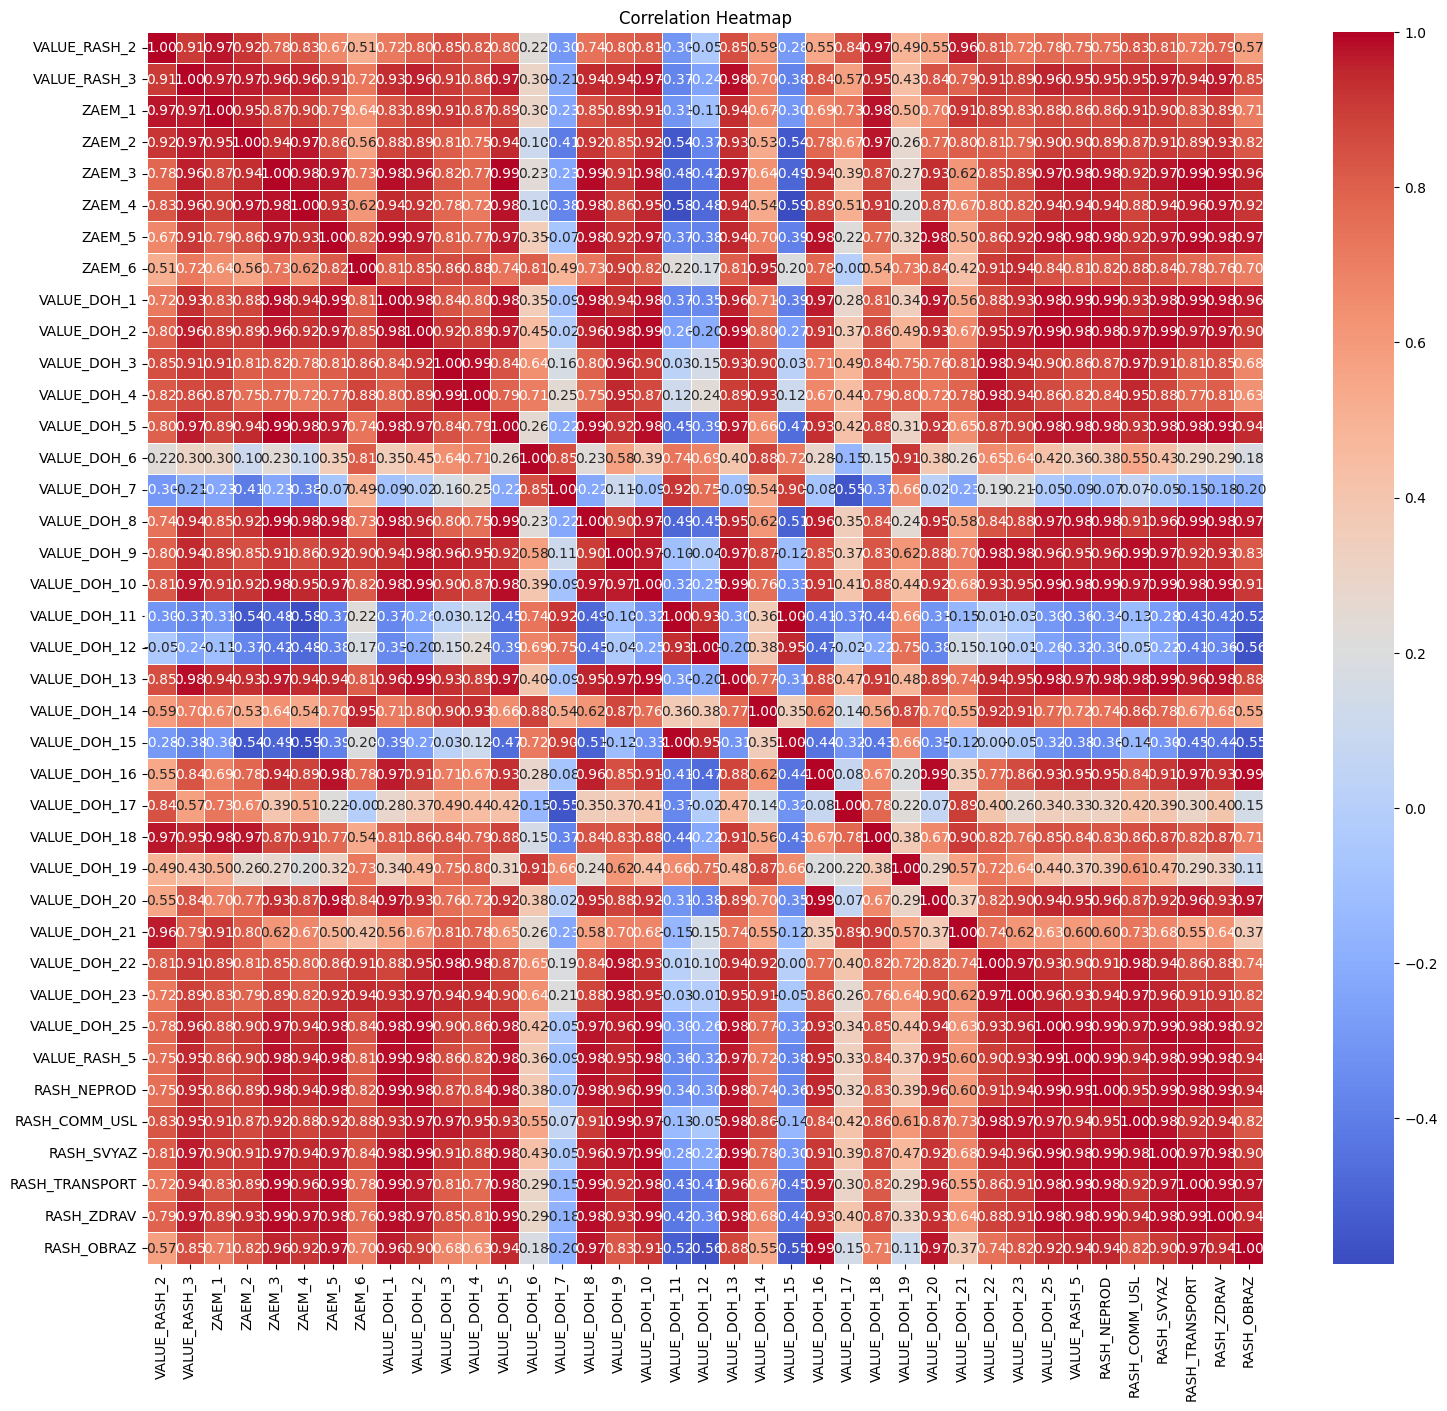

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
selected_columns = [
    'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_1', 'ZAEM_2', 'ZAEM_3', 'ZAEM_4',
    'ZAEM_5', 'ZAEM_6', 'VALUE_DOH_1', 'VALUE_DOH_2', 'VALUE_DOH_3', 'VALUE_DOH_4',
    'VALUE_DOH_5', 'VALUE_DOH_6', 'VALUE_DOH_7', 'VALUE_DOH_8', 'VALUE_DOH_9',
    'VALUE_DOH_10', 'VALUE_DOH_11', 'VALUE_DOH_12', 'VALUE_DOH_13', 'VALUE_DOH_14',
    'VALUE_DOH_15', 'VALUE_DOH_16', 'VALUE_DOH_17', 'VALUE_DOH_18', 'VALUE_DOH_19',
    'VALUE_DOH_20', 'VALUE_DOH_21', 'VALUE_DOH_22', 'VALUE_DOH_23', 'VALUE_DOH_25',
    'VALUE_RASH_5', 'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ'
]

# Subset the DataFrame with the selected columns
correlation_data = final_grouped_result[selected_columns]

# Create the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Основной источник дохода по найму и все затраты по наиболее качественным регионам (ВКО, Акмолинская, Карагандинская область)


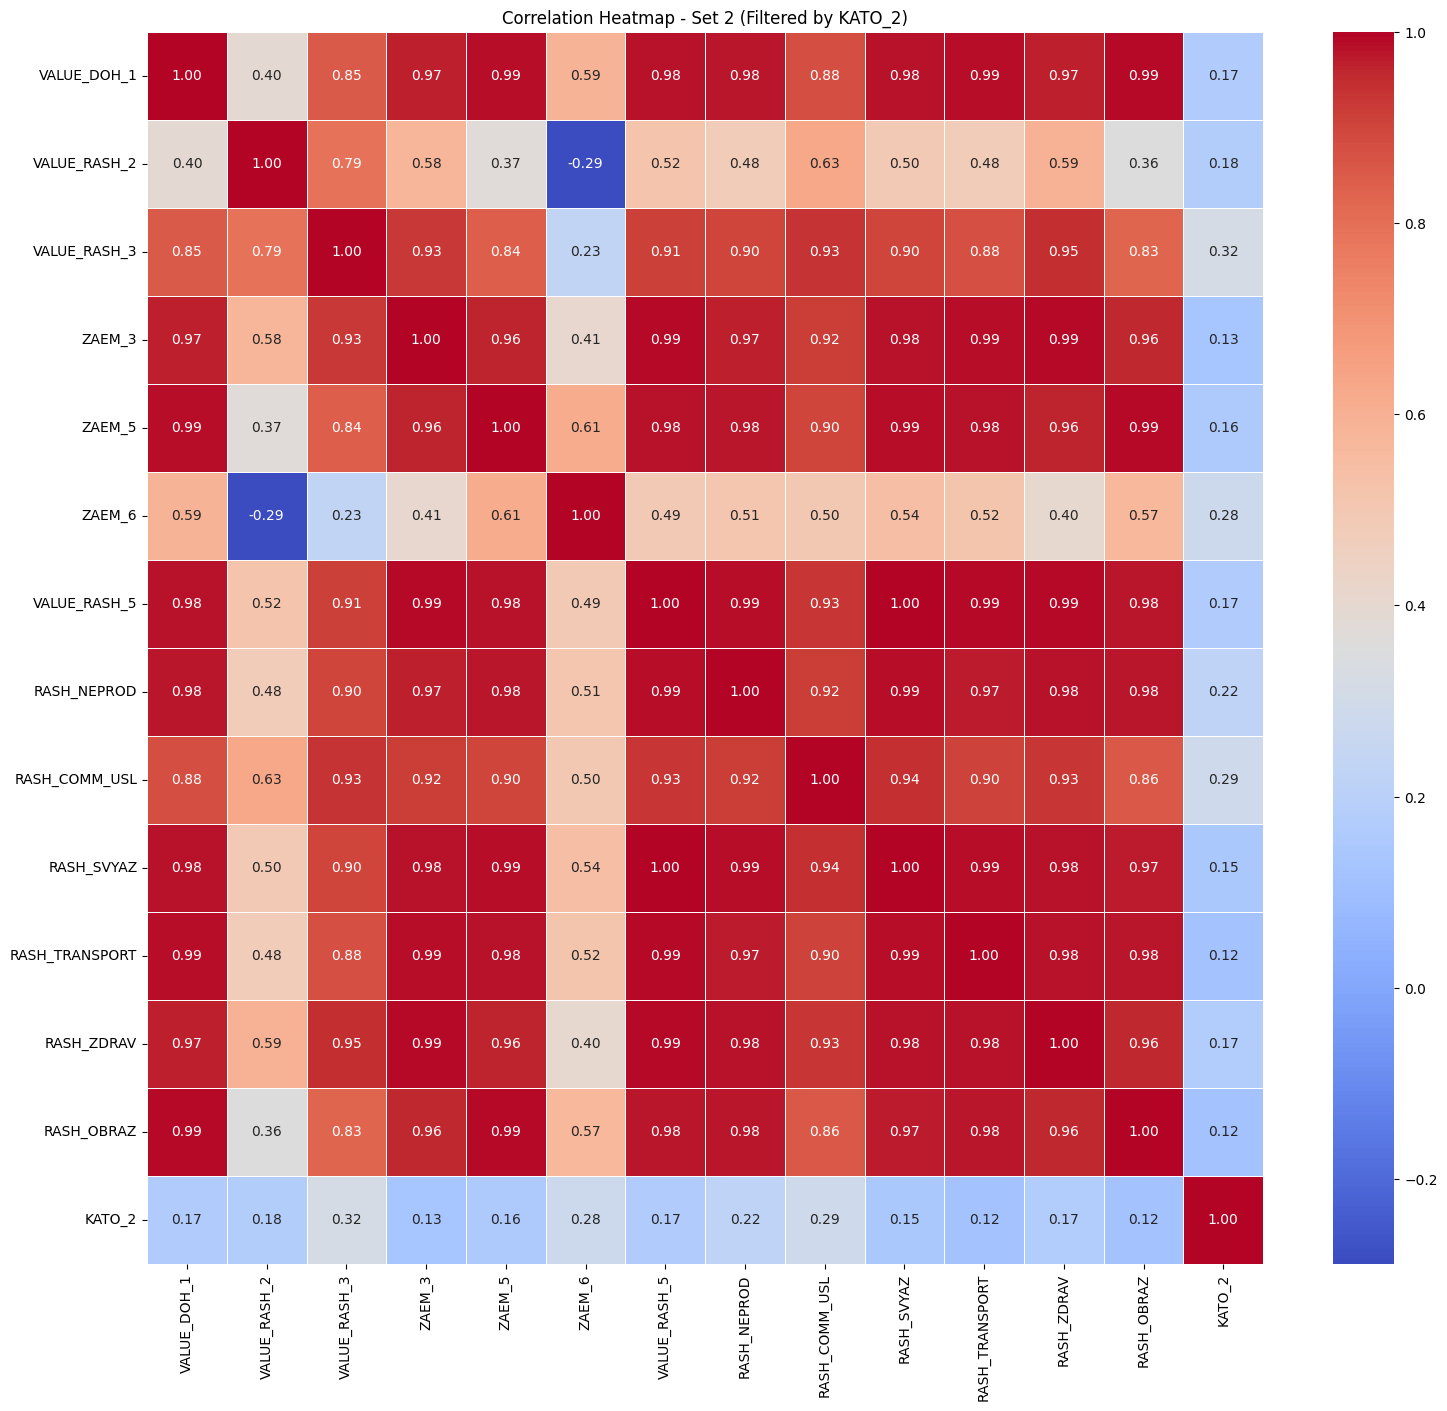

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'VALUE_DOH_1', 'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6',
    'VALUE_RASH_5', 'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ', 'KATO_2'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([11, 35, 63])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()


Основной источник дохода по найму и все затраты по наиболее ннкачественным регионам (Мангыстау, Атырау, Шымкент)


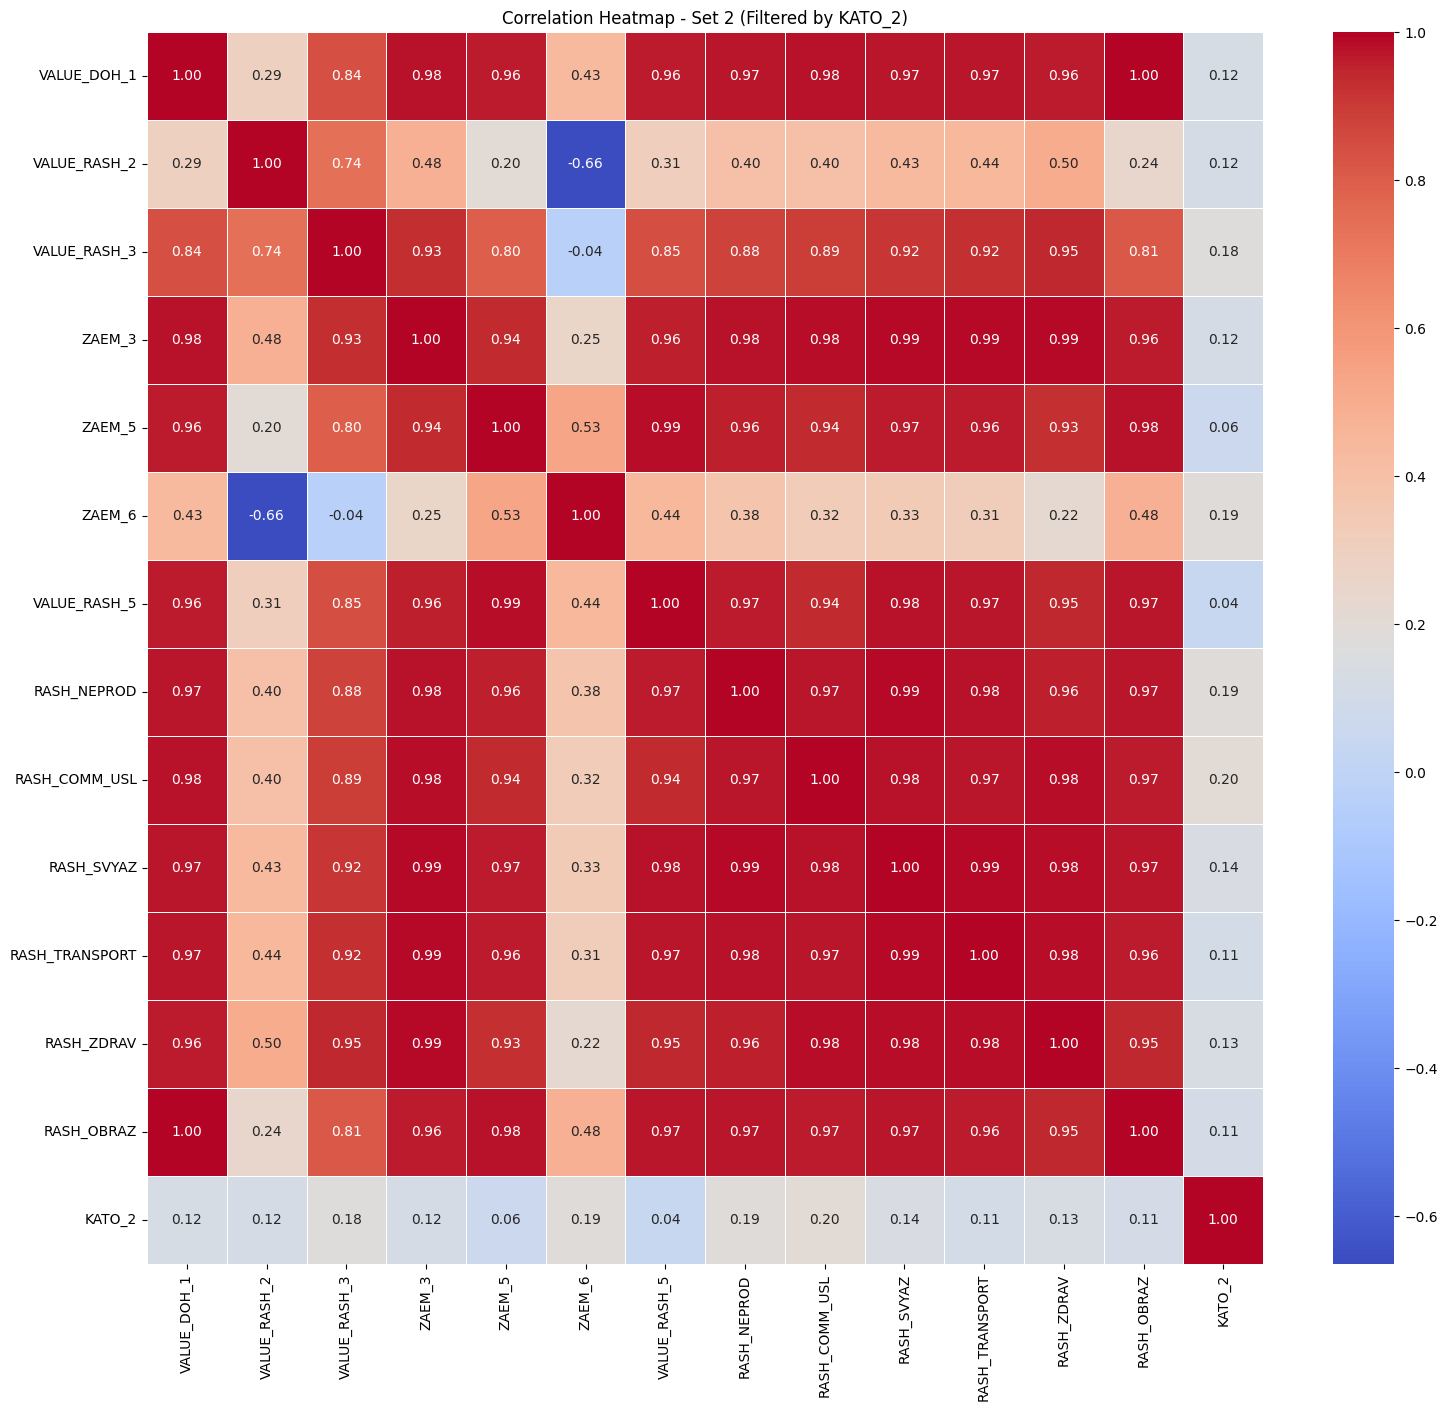

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'VALUE_DOH_1', 'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6',
    'VALUE_RASH_5', 'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ', 'KATO_2'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([79, 23, 47])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()


Некачественные доходы и качесвенные расходы по высокому индексу

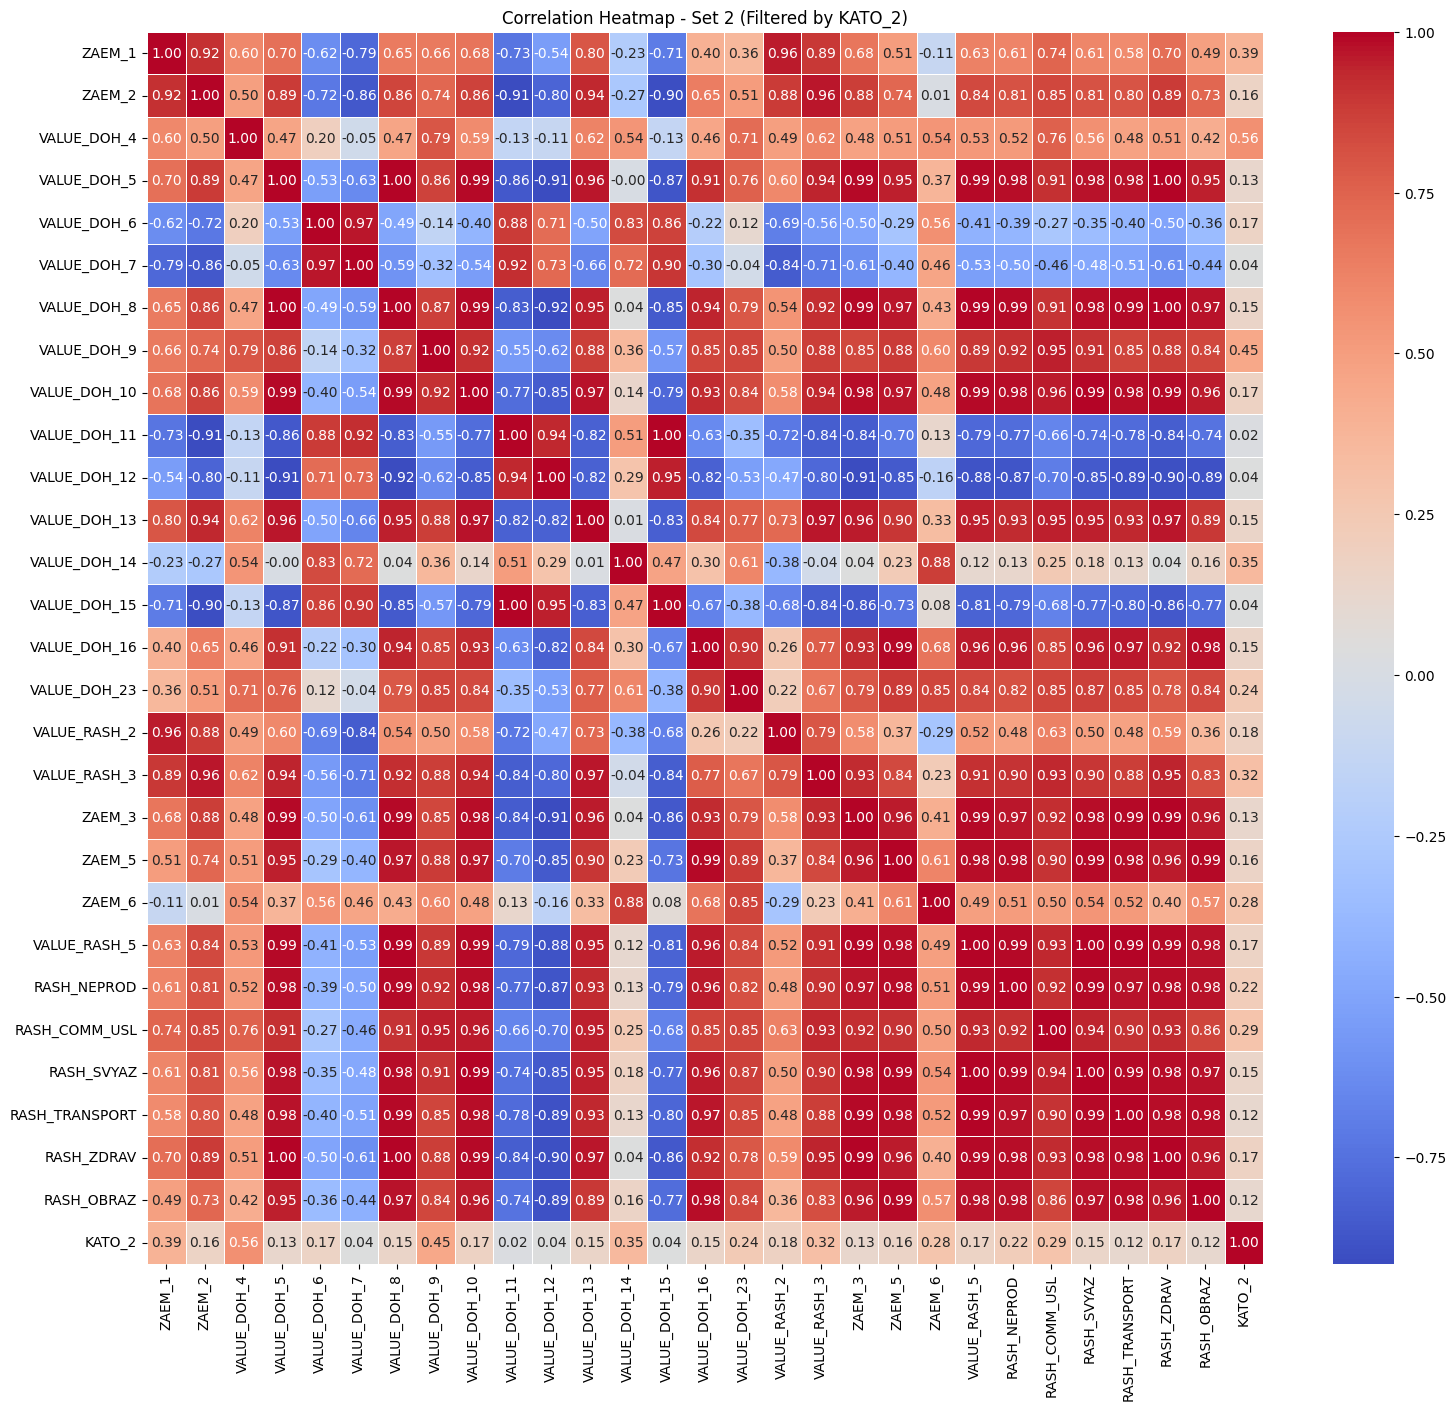

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
                    'ZAEM_1', 'ZAEM_2', 'VALUE_DOH_4', 'VALUE_DOH_5', 'VALUE_DOH_6',
                     'VALUE_DOH_7', 'VALUE_DOH_8', 'VALUE_DOH_9', 'VALUE_DOH_10',
                     'VALUE_DOH_11', 'VALUE_DOH_12', 'VALUE_DOH_13', 'VALUE_DOH_14',
                     'VALUE_DOH_15', 'VALUE_DOH_16', 'VALUE_DOH_23',

                    'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6',
    'VALUE_RASH_5', 'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ', 'KATO_2'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([11, 35, 63])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()

Некачественные доходы и качесвенные расходы по низкому индексу

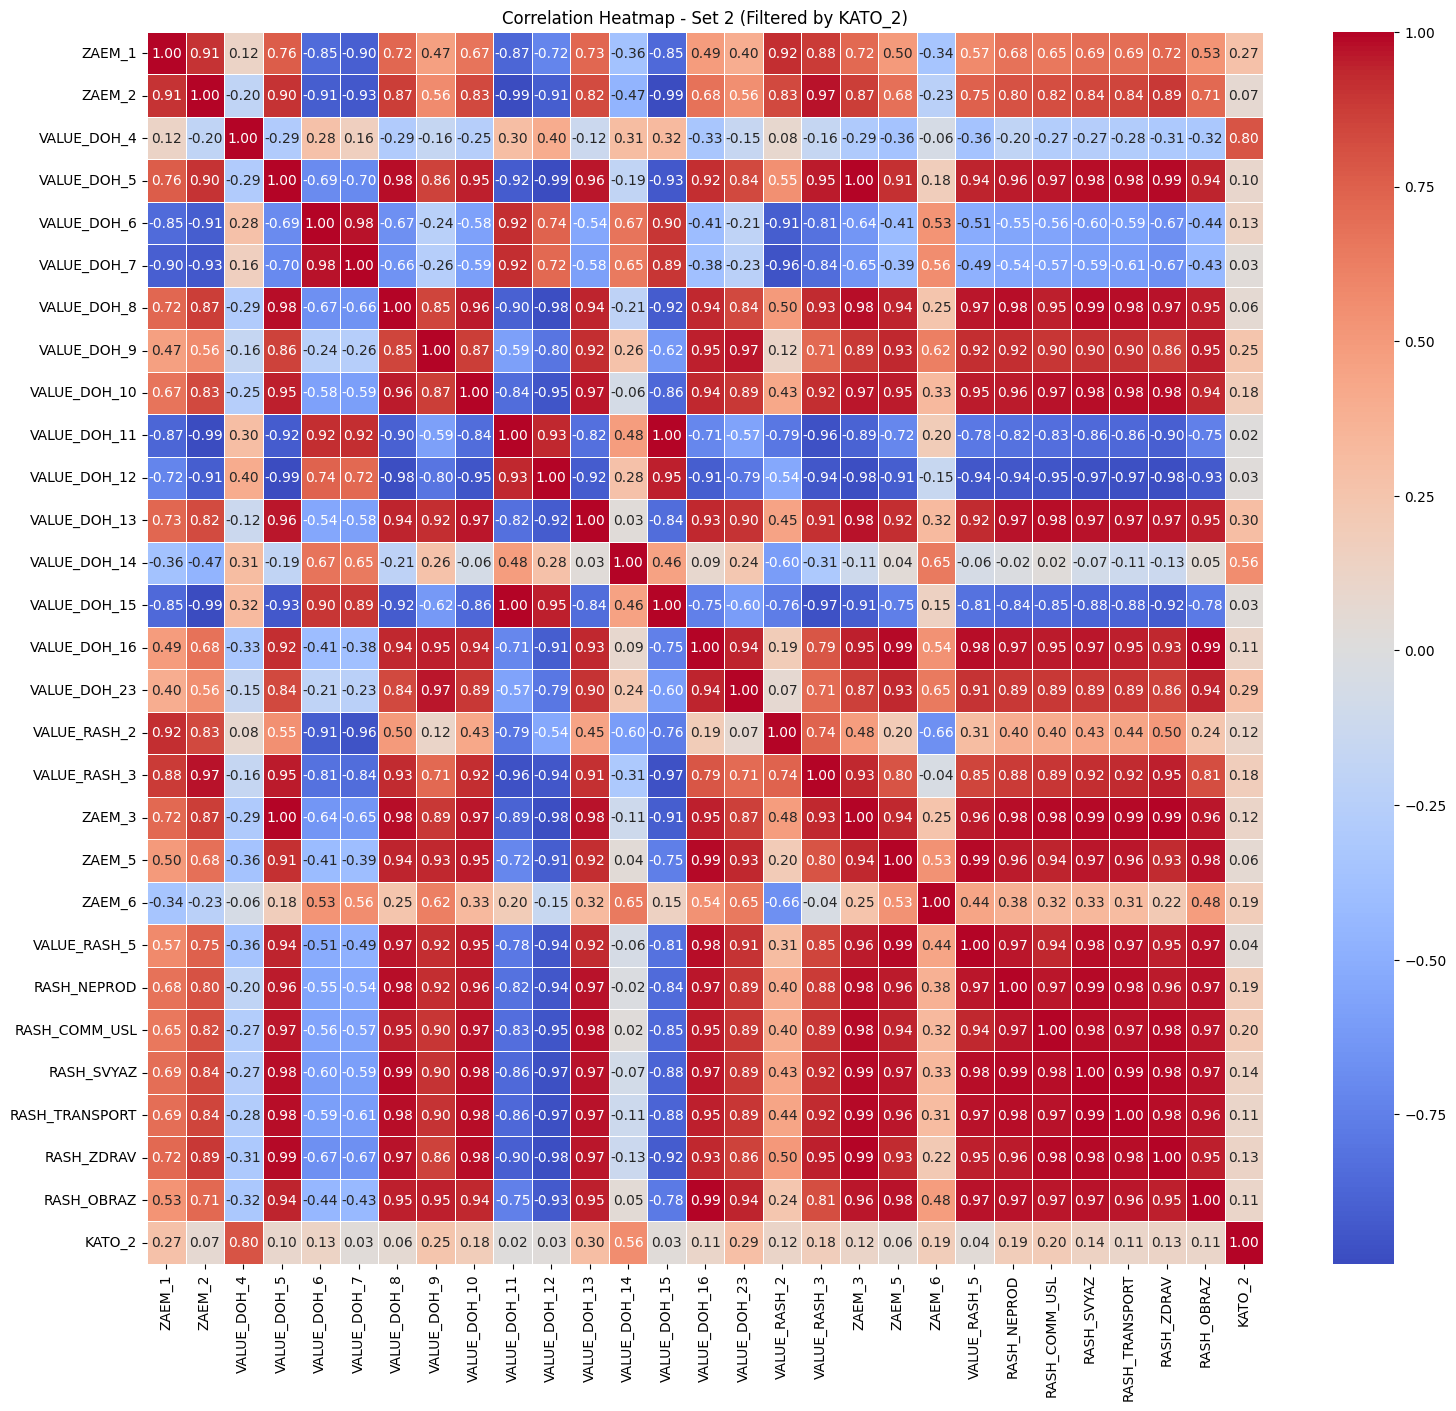

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
                    'ZAEM_1', 'ZAEM_2', 'VALUE_DOH_4', 'VALUE_DOH_5', 'VALUE_DOH_6',
                     'VALUE_DOH_7', 'VALUE_DOH_8', 'VALUE_DOH_9', 'VALUE_DOH_10',
                     'VALUE_DOH_11', 'VALUE_DOH_12', 'VALUE_DOH_13', 'VALUE_DOH_14',
                     'VALUE_DOH_15', 'VALUE_DOH_16', 'VALUE_DOH_23',

                    'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6',
    'VALUE_RASH_5', 'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ', 'KATO_2'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([79, 23, 47])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()

`Некачественные доходы и некачесвенные расходы по высокому индексу`

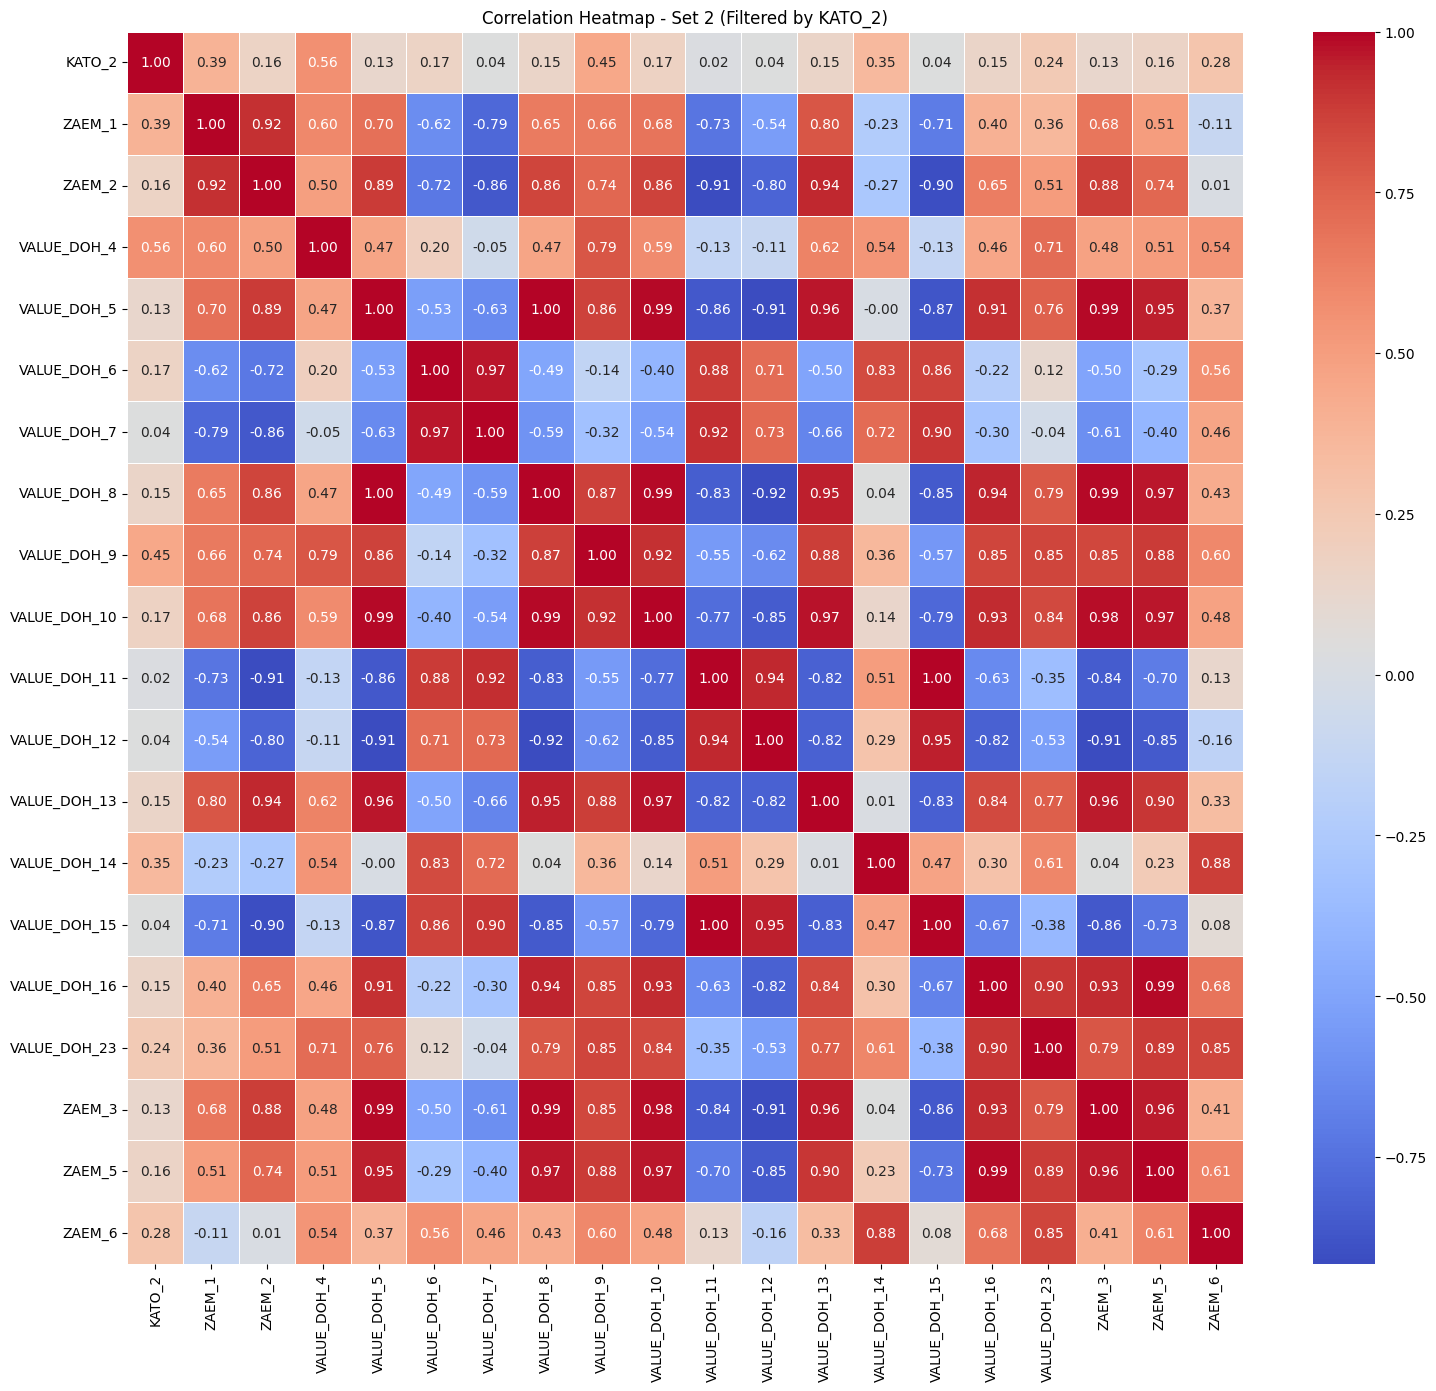

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'KATO_2', 'ZAEM_1', 'ZAEM_2', 'VALUE_DOH_4', 'VALUE_DOH_5', 'VALUE_DOH_6',
    'VALUE_DOH_7', 'VALUE_DOH_8', 'VALUE_DOH_9', 'VALUE_DOH_10',
    'VALUE_DOH_11', 'VALUE_DOH_12', 'VALUE_DOH_13', 'VALUE_DOH_14',
    'VALUE_DOH_15', 'VALUE_DOH_16', 'VALUE_DOH_23', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([11, 35, 63])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()


Некачественные доходы и некачесвенные расходы по низкому индексу

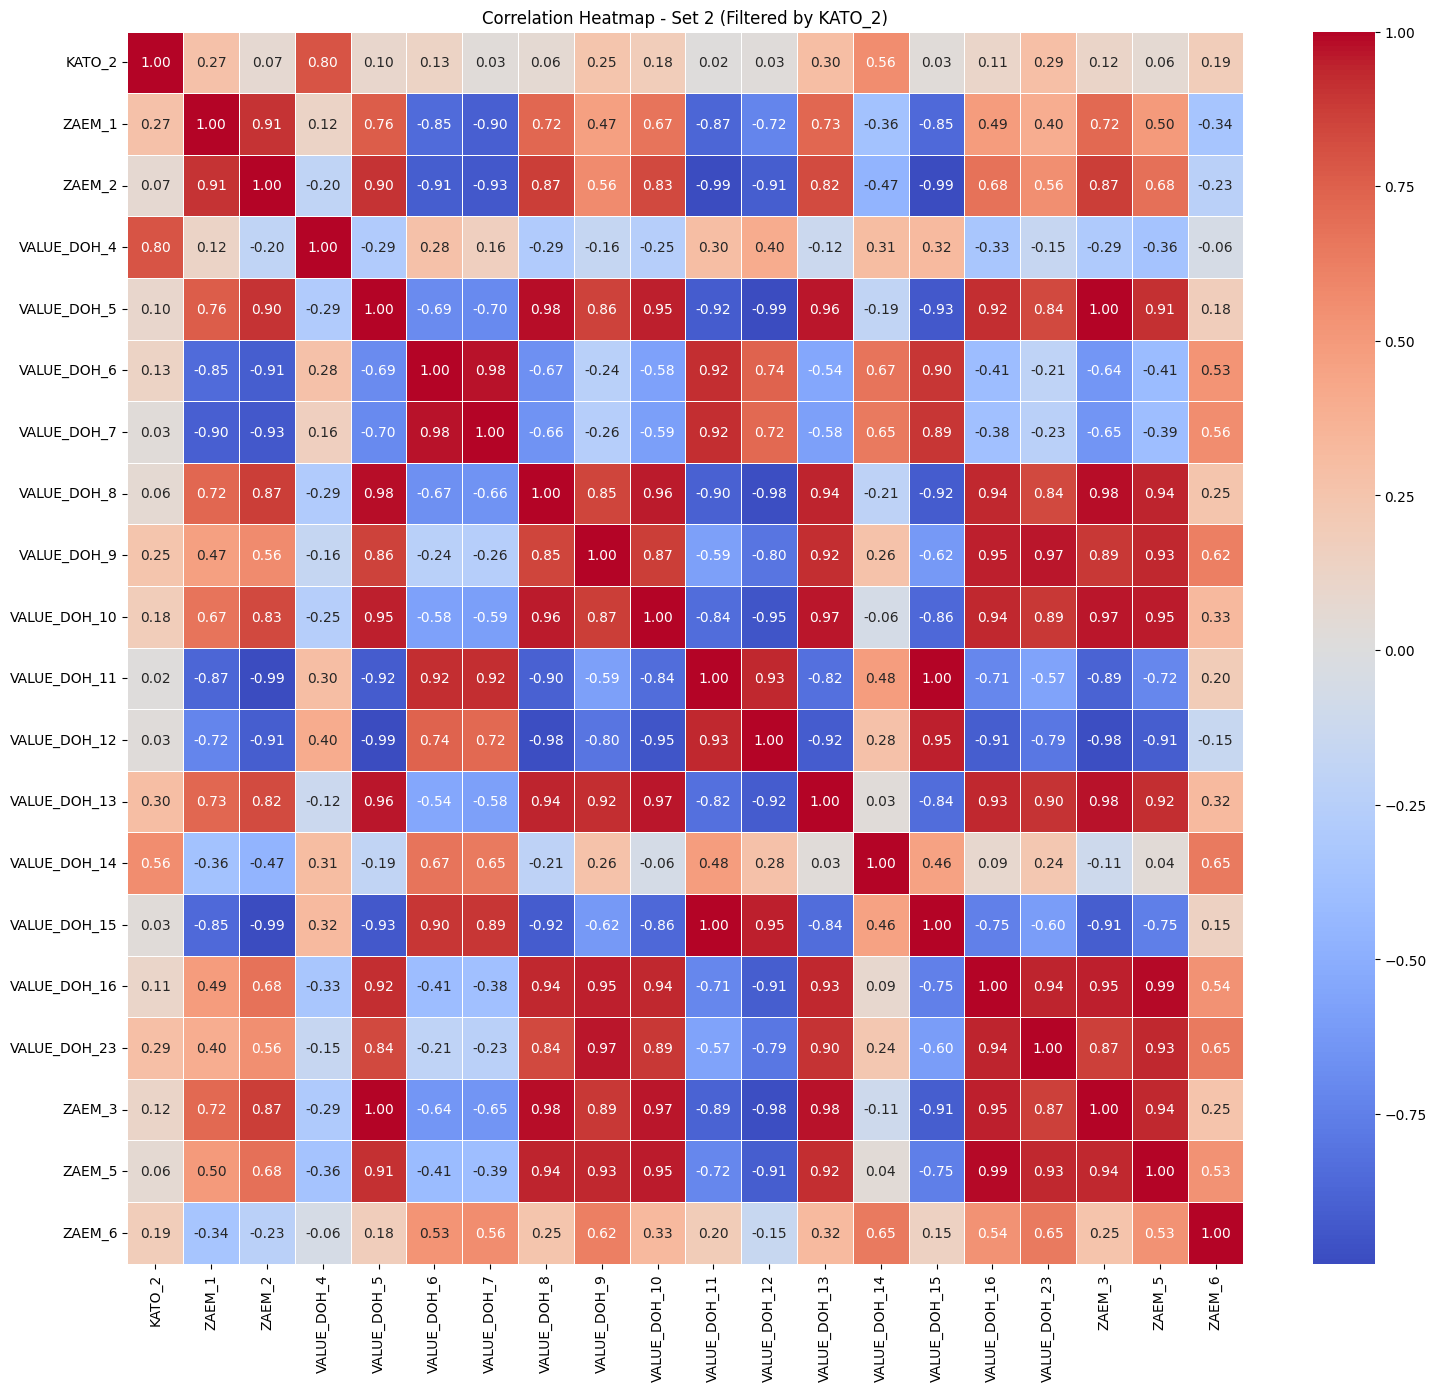

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'KATO_2', 'ZAEM_1', 'ZAEM_2', 'VALUE_DOH_4', 'VALUE_DOH_5', 'VALUE_DOH_6',
    'VALUE_DOH_7', 'VALUE_DOH_8', 'VALUE_DOH_9', 'VALUE_DOH_10',
    'VALUE_DOH_11', 'VALUE_DOH_12', 'VALUE_DOH_13', 'VALUE_DOH_14',
    'VALUE_DOH_15', 'VALUE_DOH_16', 'VALUE_DOH_23', 'ZAEM_3', 'ZAEM_5', 'ZAEM_6'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([79, 23, 47])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()


Качественные доходы и некачесвенные расходы по высокому индексу

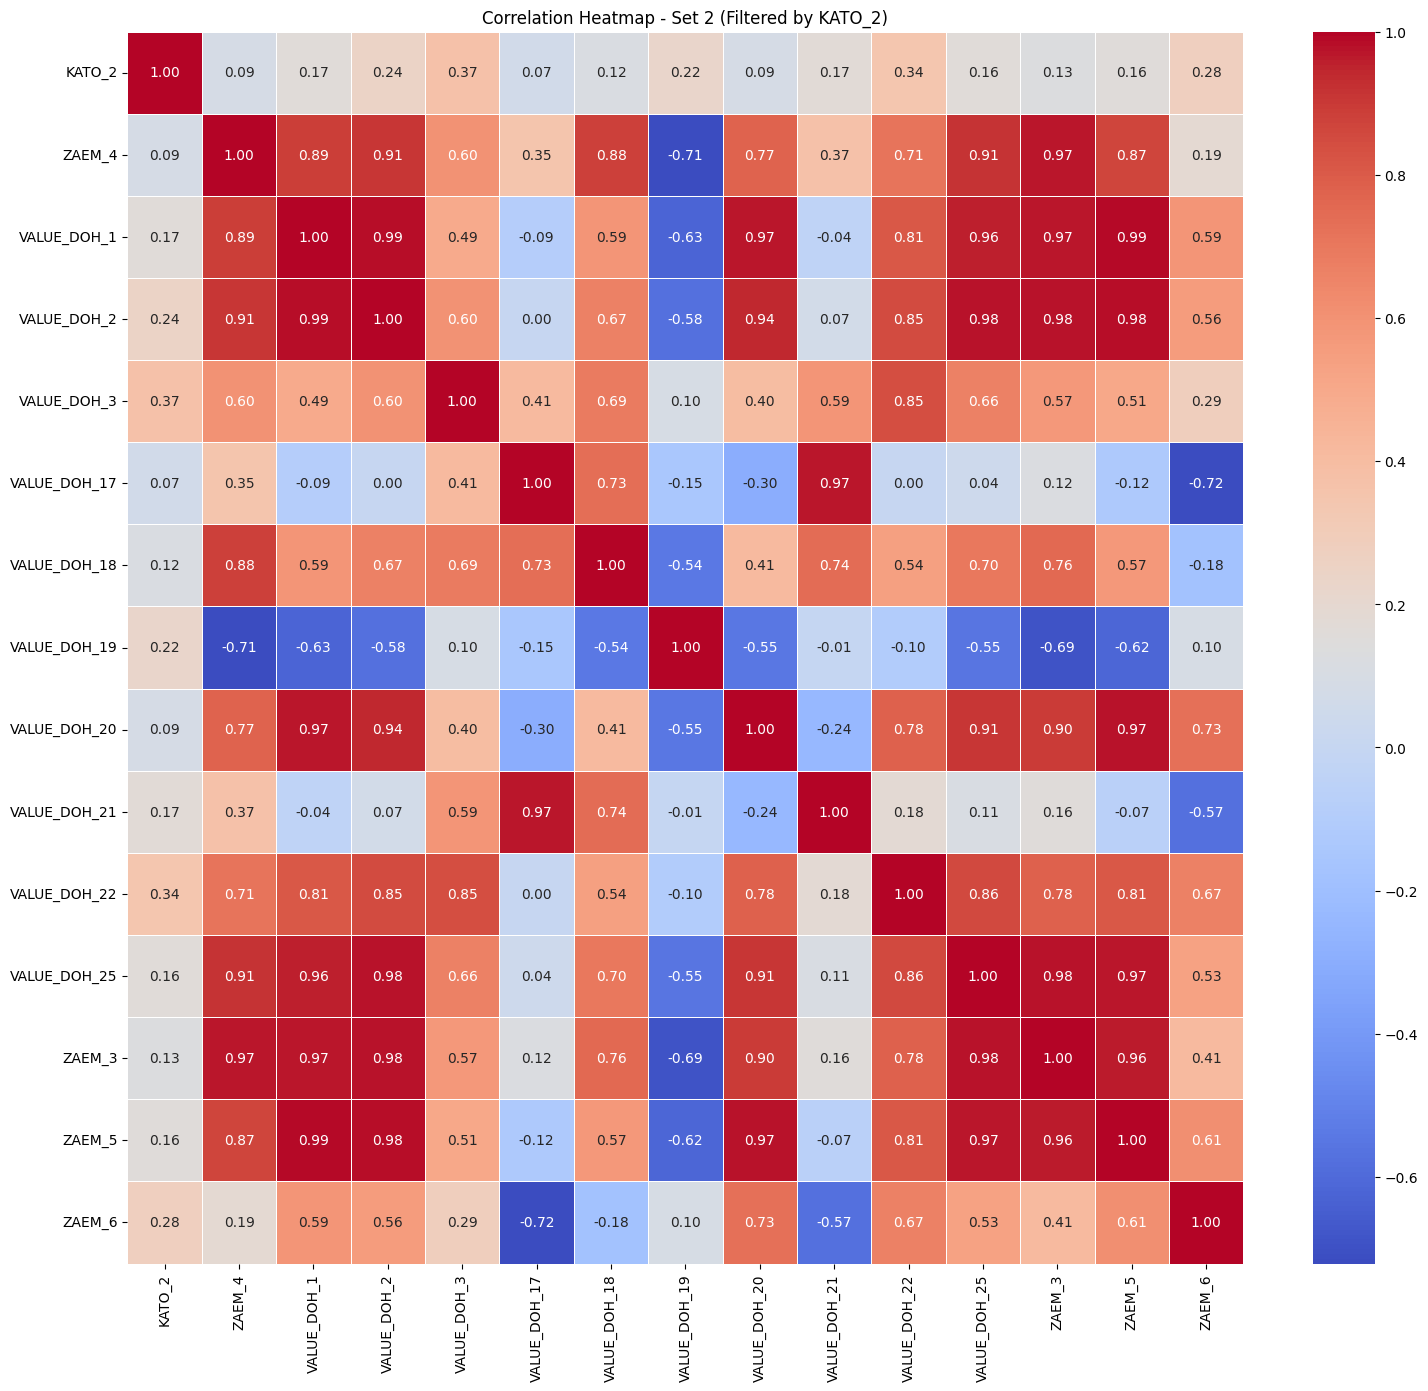

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'KATO_2',
    'ZAEM_4', 'VALUE_DOH_1', 'VALUE_DOH_2', 'VALUE_DOH_3', 'VALUE_DOH_17',
    'VALUE_DOH_18', 'VALUE_DOH_19', 'VALUE_DOH_20', 'VALUE_DOH_21',
    'VALUE_DOH_22', 'VALUE_DOH_25',
    'ZAEM_3', 'ZAEM_5', 'ZAEM_6'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([11, 35, 63])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()

Качественные доходы и некачесвенные расходы по низкому индексу

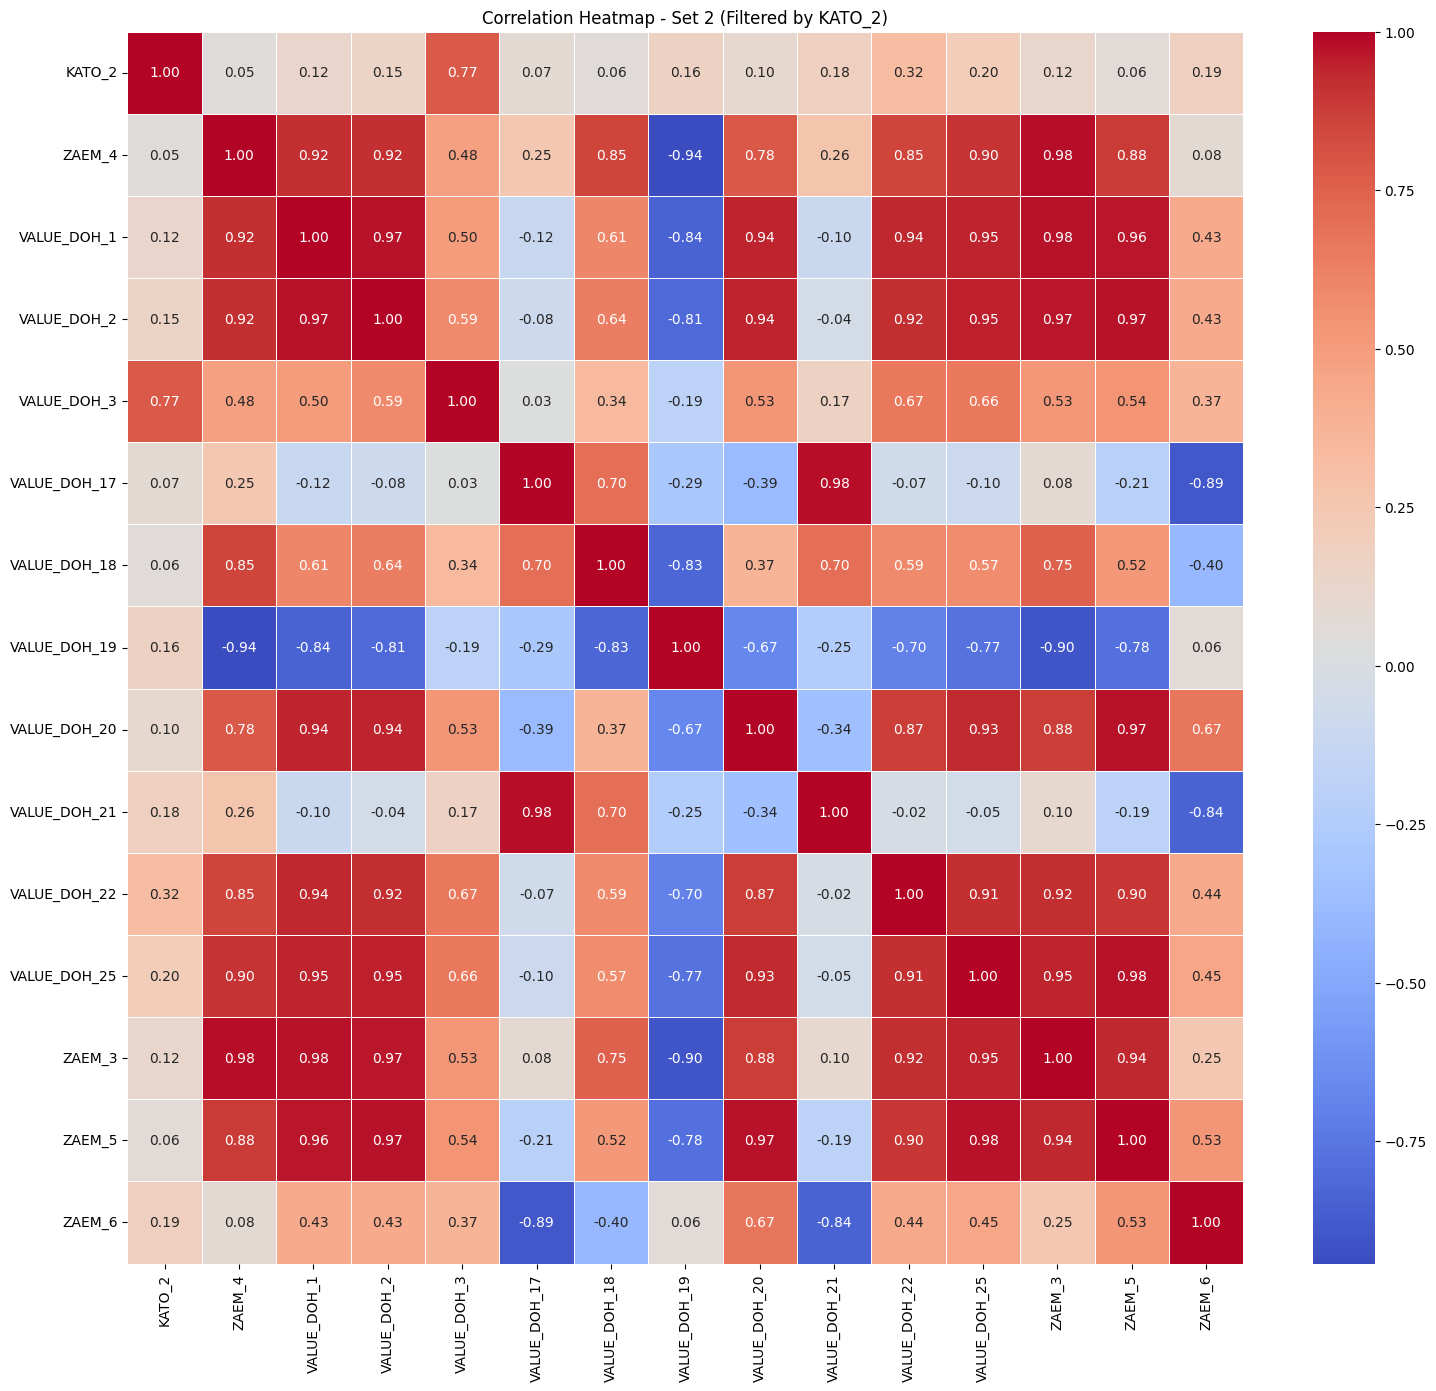

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'KATO_2',
    'ZAEM_4', 'VALUE_DOH_1', 'VALUE_DOH_2', 'VALUE_DOH_3', 'VALUE_DOH_17',
    'VALUE_DOH_18', 'VALUE_DOH_19', 'VALUE_DOH_20', 'VALUE_DOH_21',
    'VALUE_DOH_22', 'VALUE_DOH_25',
    'ZAEM_3', 'ZAEM_5', 'ZAEM_6'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([79, 23, 47])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()

Качественные доходы и качесвенные расходы по высокому индексу

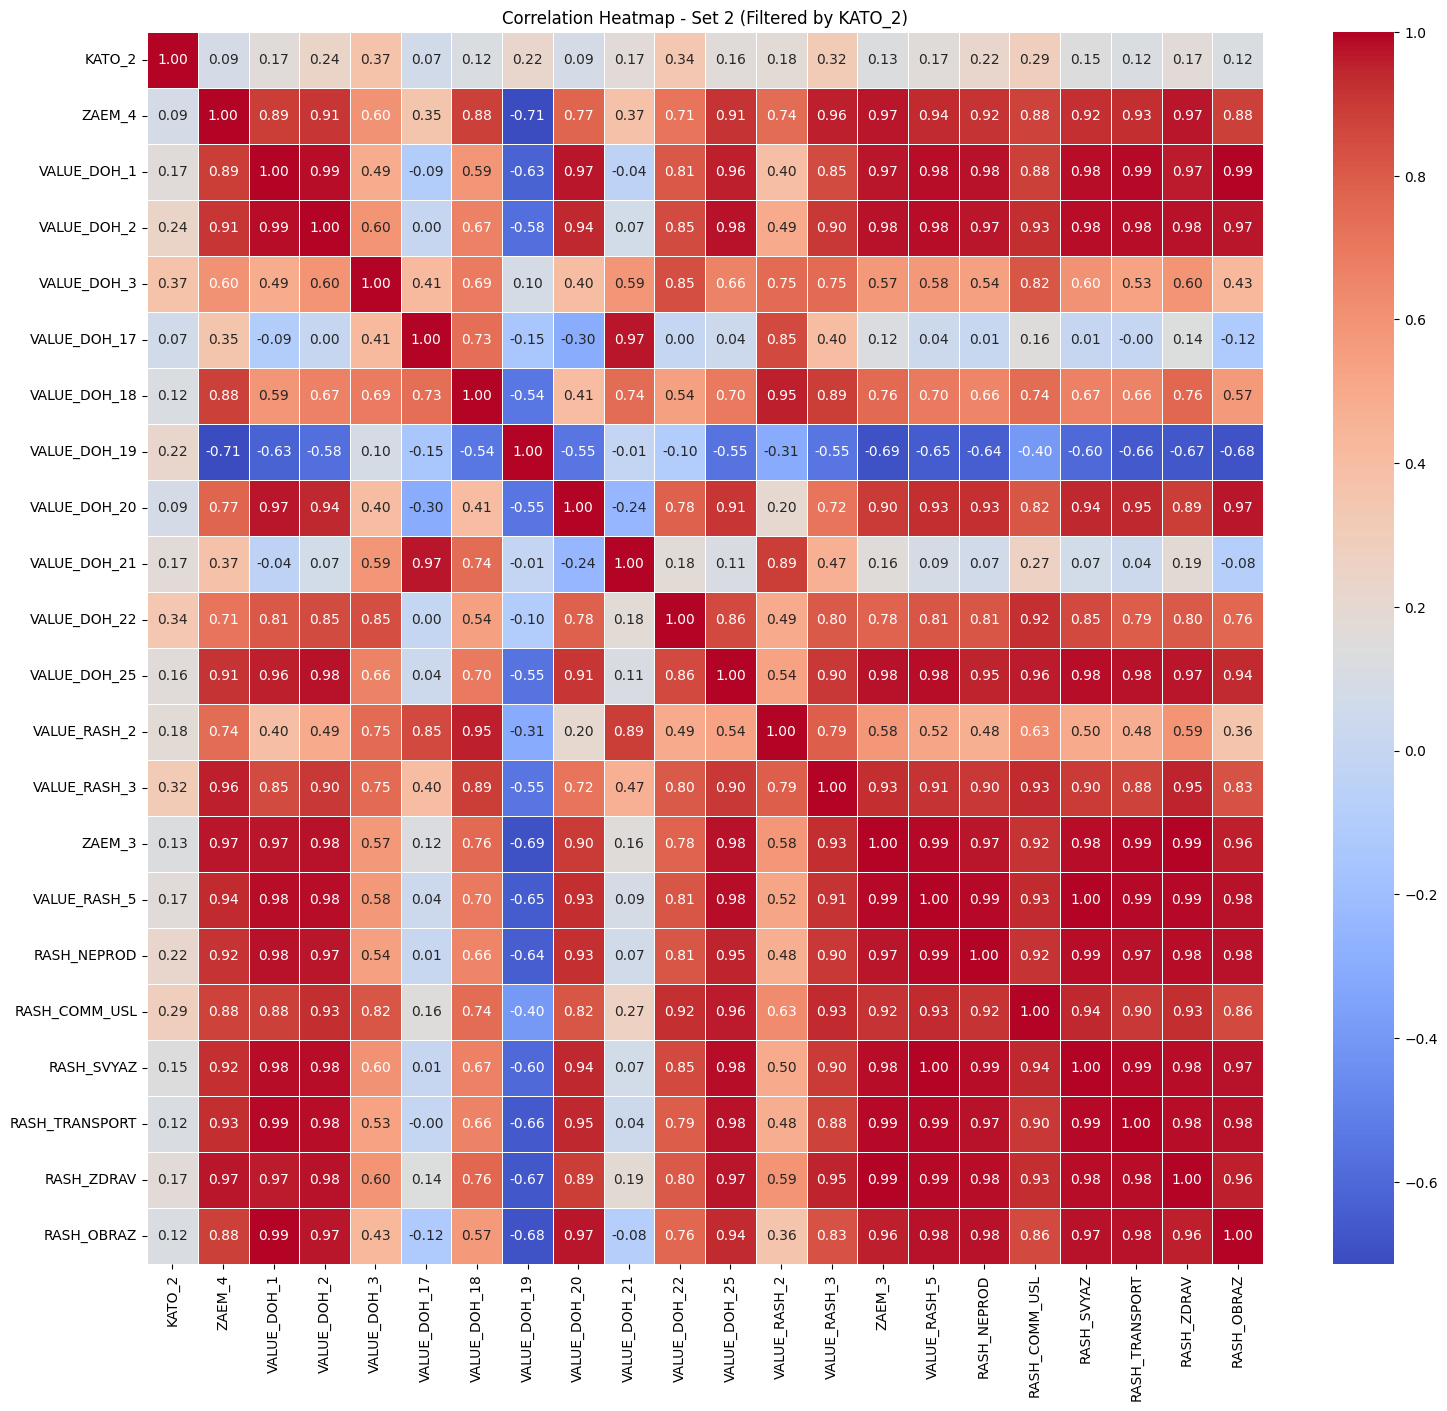

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the second correlation analysis
selected_columns_2 = [
    'KATO_2',
    'ZAEM_4', 'VALUE_DOH_1', 'VALUE_DOH_2', 'VALUE_DOH_3', 'VALUE_DOH_17',
    'VALUE_DOH_18', 'VALUE_DOH_19', 'VALUE_DOH_20', 'VALUE_DOH_21',
    'VALUE_DOH_22', 'VALUE_DOH_25',
    'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'VALUE_RASH_5',
    'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([11, 35, 63])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()

Качественные доходы и качесвенные расходы по низкому индексу

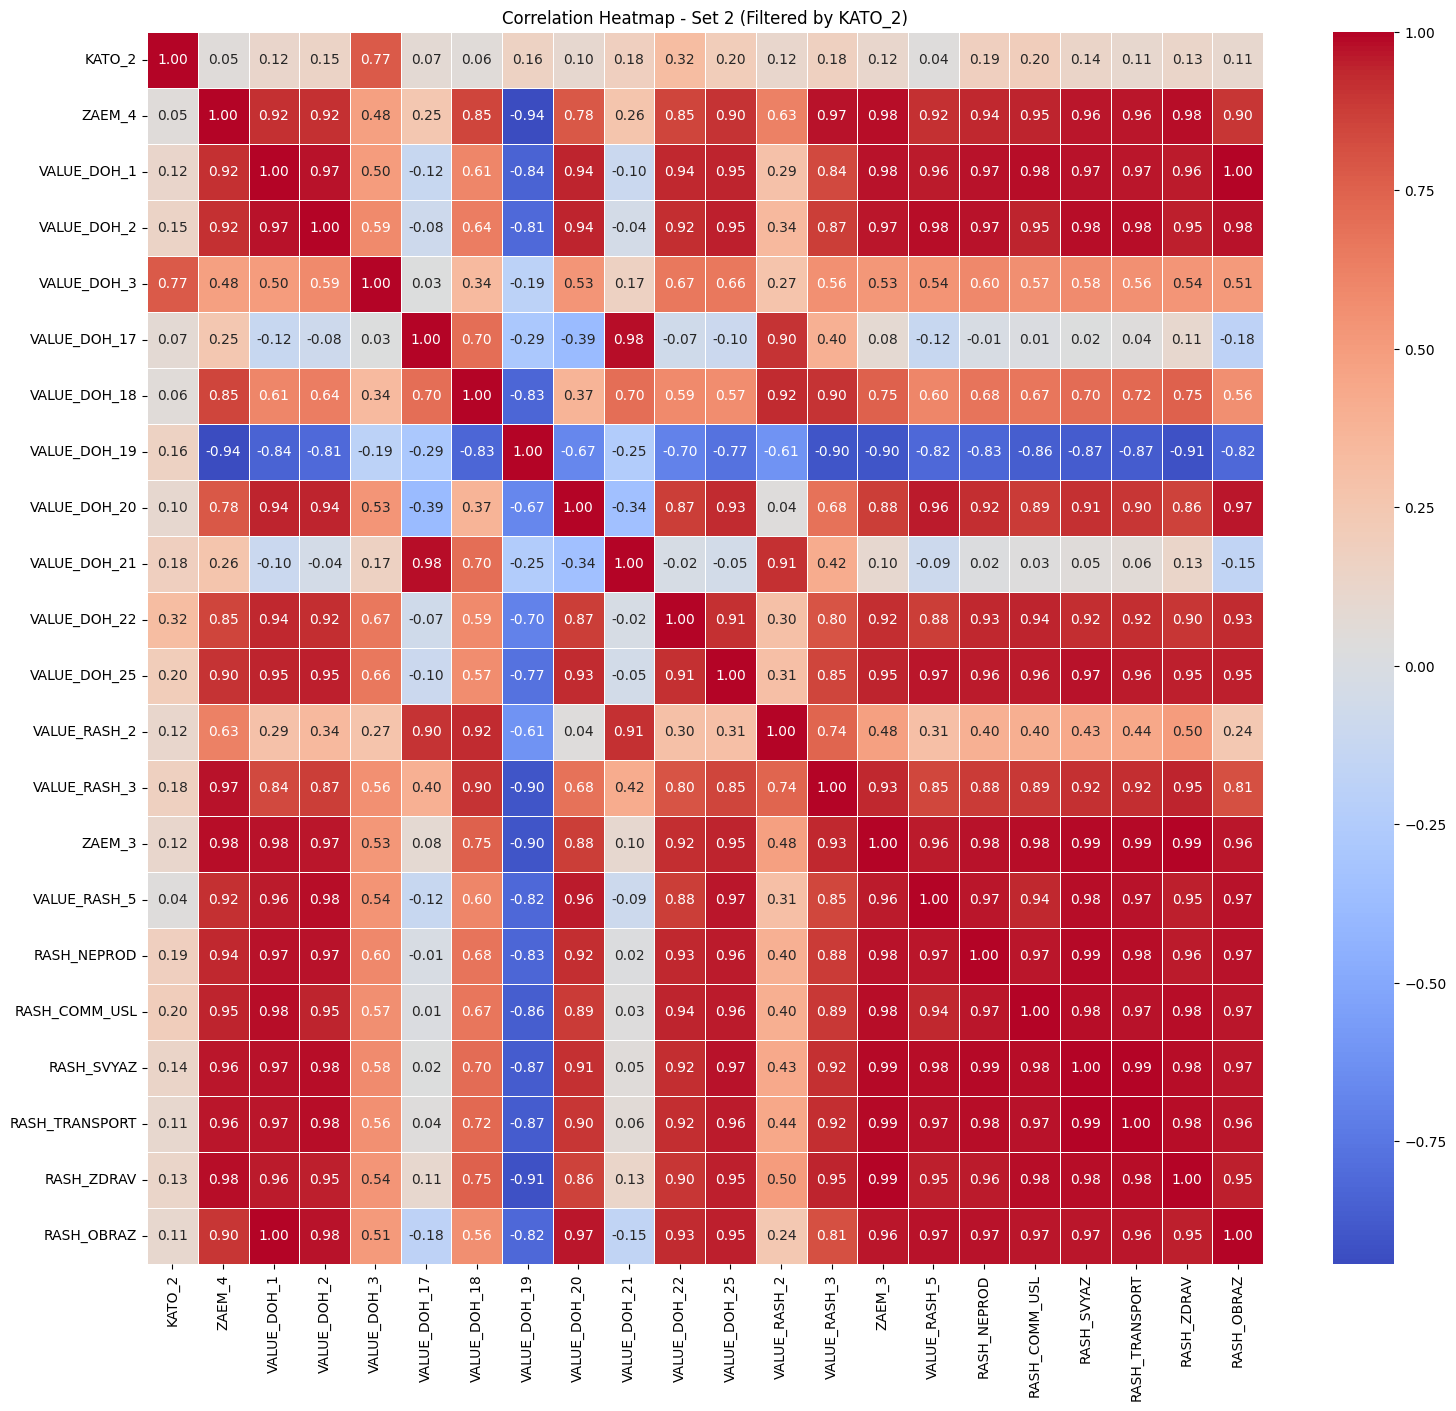

In [18]:
# Select the columns for the second correlation analysis
selected_columns_2 = [
    'KATO_2',
    'ZAEM_4', 'VALUE_DOH_1', 'VALUE_DOH_2', 'VALUE_DOH_3', 'VALUE_DOH_17',
    'VALUE_DOH_18', 'VALUE_DOH_19', 'VALUE_DOH_20', 'VALUE_DOH_21',
    'VALUE_DOH_22', 'VALUE_DOH_25',
    'VALUE_RASH_2', 'VALUE_RASH_3', 'ZAEM_3', 'VALUE_RASH_5',
    'RASH_NEPROD', 'RASH_COMM_USL', 'RASH_SVYAZ', 'RASH_TRANSPORT',
    'RASH_ZDRAV', 'RASH_OBRAZ'
]

# Subset the DataFrame with the selected columns
correlation_data_2 = final_grouped_result[selected_columns_2]

# Filter data by specific values in 'KATO_2'
filtered_data_2 = correlation_data_2[correlation_data_2['KATO_2'].isin([79, 23, 47])]

# Create the correlation matrix for the filtered set of columns
correlation_matrix_2 = filtered_data_2.corr()

# Create the heatmap for the filtered set of columns
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Set 2 (Filtered by KATO_2)')
plt.show()